In [1]:
import pandas as pd
df = pd.read_csv('smart_meter_data.csv')

In [2]:
df.head()

,datetime,msn,location,daily_consumption_load,energy_supplied,energy_billed
0,2021-01-01 00:00:00,ACE43B7D,Chennai,2.59,2.78,2.57
1,2021-01-01 00:15:00,ACE43B7D,Chennai,1.78,2.12,1.86
2,2021-01-01 00:30:00,ACE43B7D,Chennai,2.59,2.68,2.52
3,2021-01-01 00:45:00,ACE43B7D,Chennai,2.45,2.56,2.50
4,2021-01-01 01:00:00,ACE43B7D,Chennai,1.48,1.56,1.49


In [3]:
df.describe()

,daily_consumption_load,energy_supplied,energy_billed
count,525600.000000,525600.000000,525600.000000
mean,2.542772,2.748650,2.542735
std,1.213020,1.300398,1.210173
min,0.410000,0.500000,0.430000
25%,1.490000,1.620000,1.490000
50%,2.540000,2.750000,2.540000
75%,3.570000,3.880000,3.580000
max,5.230000,5.000000,5.000000


In [4]:
df['msn'].nunique()

5

In [7]:
#plot the consumption over time for a specific meter
import matplotlib.pyplot as plt
meter_id = df['msn'].unique()[0]
meter_data = df[df['msn'] == meter_id]
print(meter_id)
print(meter_data.head())
print(meter_data.shape)
plt.plot(meter_data['datetime'], meter_data['daily_consumption_load'])
plt.xlabel('Date')
plt.ylabel('Daily Consumption Load')
plt.title(f'Meter ID: {meter_id} Consumption Over Time')
plt.show()


ACE43B7D
              datetime       msn location  daily_consumption_load  \
0  2021-01-01 00:00:00  ACE43B7D  Chennai                    2.59   
1  2021-01-01 00:15:00  ACE43B7D  Chennai                    1.78   
2  2021-01-01 00:30:00  ACE43B7D  Chennai                    2.59   
3  2021-01-01 00:45:00  ACE43B7D  Chennai                    2.45   
4  2021-01-01 01:00:00  ACE43B7D  Chennai                    1.48   

   energy_supplied  energy_billed  
0             2.78           2.57  
1             2.12           1.86  
2             2.68           2.52  
3             2.56           2.50  
4             1.56           1.49  
(105120, 6)


KeyboardInterrupt: 

C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\2832984664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meter_data['datetime'] = pd.to_datetime(meter_data['datetime'])
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\2832984664.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = meter_data['daily_consumption_load'].resample('M').mean()


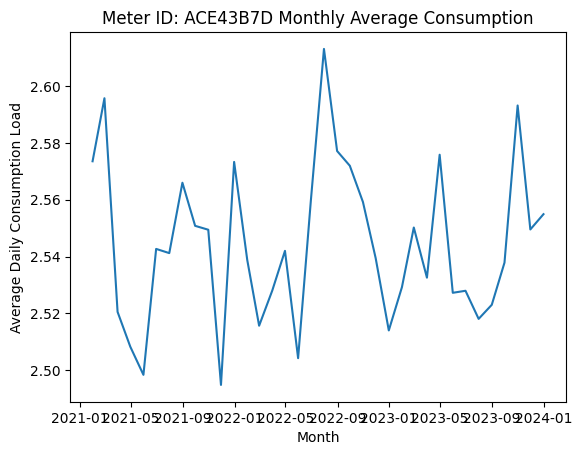

In [8]:
# plot monthly average consumption for the same meter for all years
meter_data['datetime'] = pd.to_datetime(meter_data['datetime'])
meter_data.set_index('datetime', inplace=True)
monthly_avg = meter_data['daily_consumption_load'].resample('M').mean()
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xlabel('Month')
plt.ylabel('Average Daily Consumption Load')
plt.title(f'Meter ID: {meter_id} Monthly Average Consumption')
plt.show()


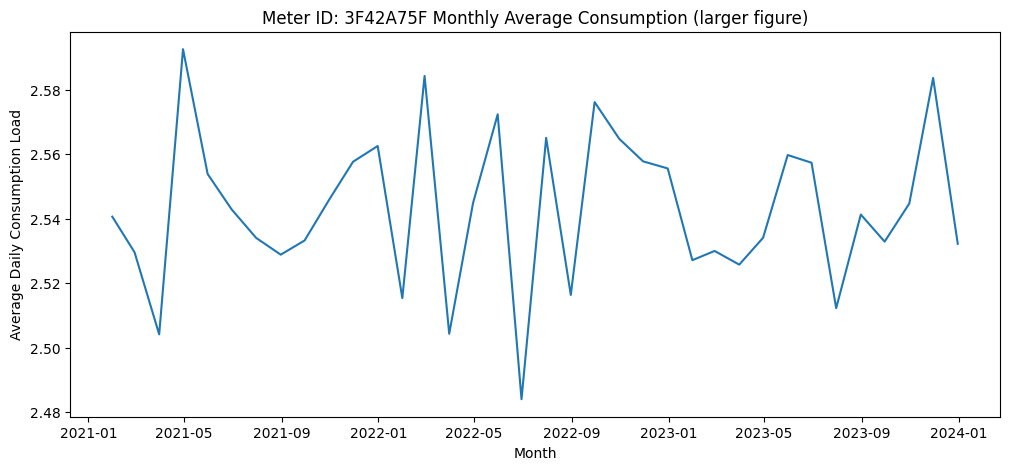

C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\3294698000.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = meter_data['daily_consumption_load'].resample('M').mean()
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\3294698000.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = meter_data['daily_consumption_load'].resample('M').mean()
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\3294698000.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = meter_data['daily_consumption_load'].resample('M').mean()
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\3294698000.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = meter_data['daily_consumption_load'].resample('M').mean()
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\3294698000.p

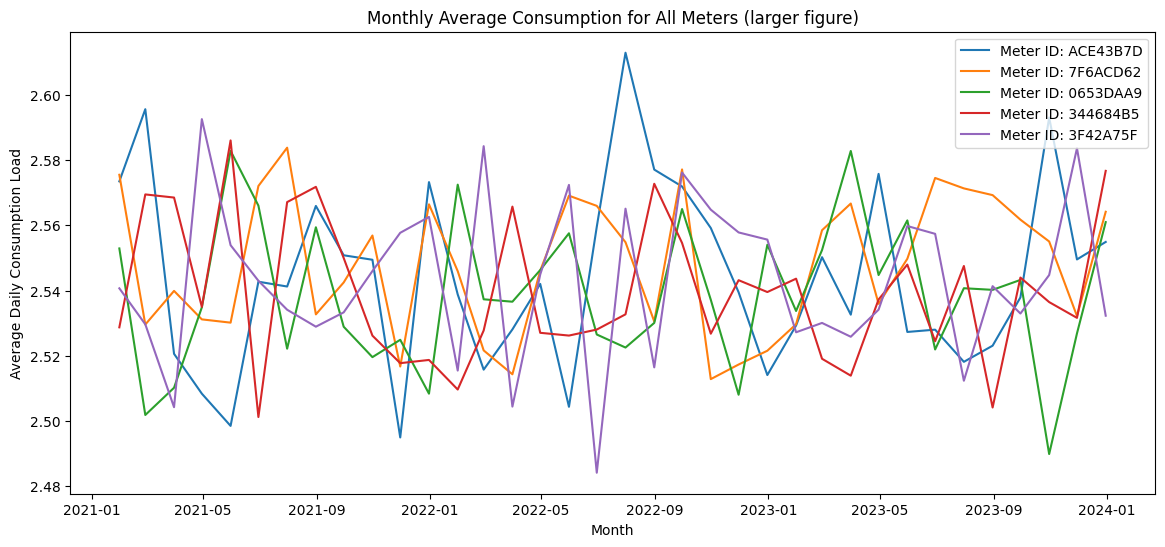

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xlabel('Month')
plt.ylabel('Average Daily Consumption Load')
plt.title(f'Meter ID: {meter_id} Monthly Average Consumption (larger figure)')
plt.show()

# larger figsize for all meters (use .copy() to avoid SettingWithCopyWarning)
plt.figure(figsize=(14, 6))
for meter_id in df['msn'].unique():
    meter_data = df[df['msn'] == meter_id].copy()
    meter_data['datetime'] = pd.to_datetime(meter_data['datetime'])
    meter_data.set_index('datetime', inplace=True)
    monthly = meter_data['daily_consumption_load'].resample('M').mean()
    plt.plot(monthly.index, monthly.values, label=f'Meter ID: {meter_id}')
plt.xlabel('Month')
plt.ylabel('Average Daily Consumption Load')
plt.title('Monthly Average Consumption for All Meters (larger figure)')
plt.legend()
plt.show()

C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\1176890058.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = meter_data['daily_consumption_load'].resample('M').mean()
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\1176890058.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = meter_data['daily_consumption_load'].resample('M').mean()
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\1176890058.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = meter_data['daily_consumption_load'].resample('M').mean()
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\1176890058.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = meter_data['daily_consumption_load'].resample('M').mean()
C:\Users\RRC\AppData\Local\Temp\ipykernel_21372\1176890058.py:7:

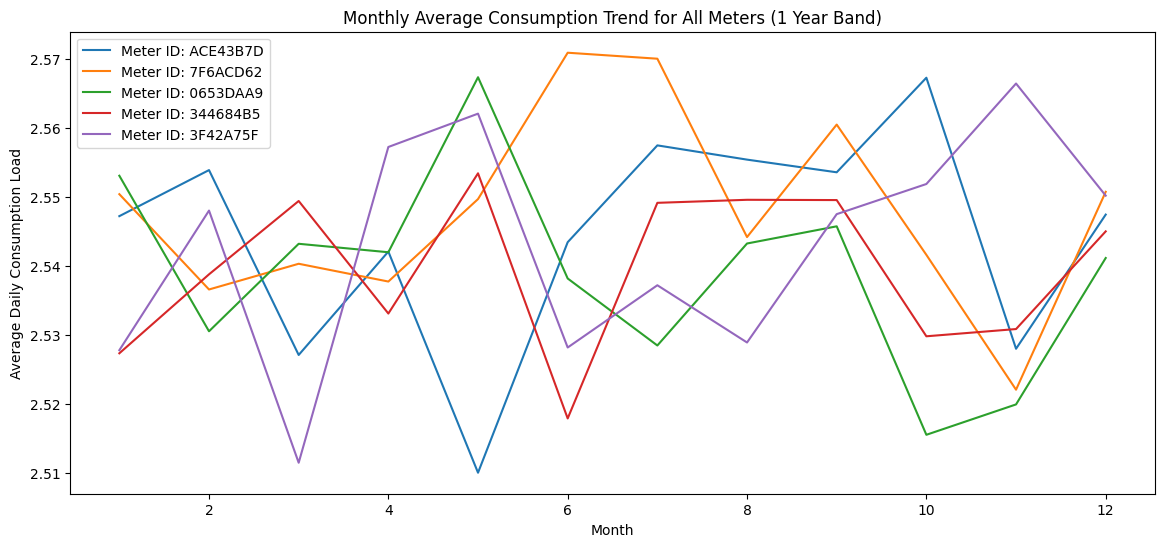